#Importing necessary modules

In [ ]:
import numpy as np  # Numerical calculations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting

# Import necessary layers for building the neural network model
import keras
from keras.datasets import mnist  # MNIST dataset

from keras.models import Sequential  # Sequential model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout  # Layer types

from tensorflow.math import confusion_matrix  # Confusion matrix function


##Get Data & pre-process it

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
def plot_input_img(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title(y_train[i])
  plt.show()

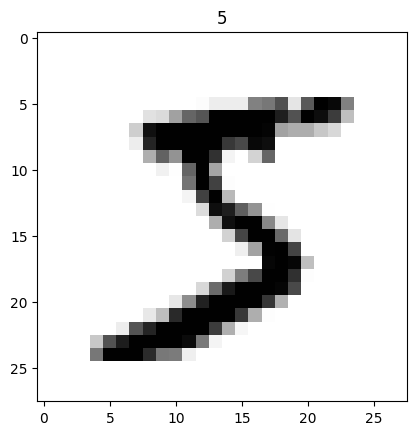

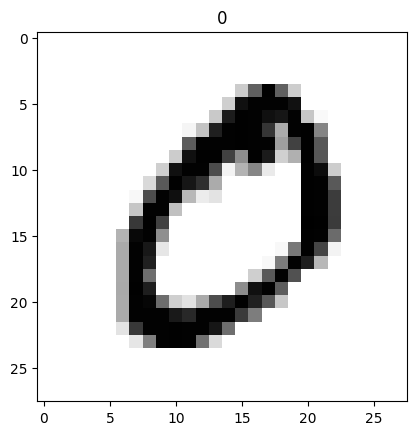

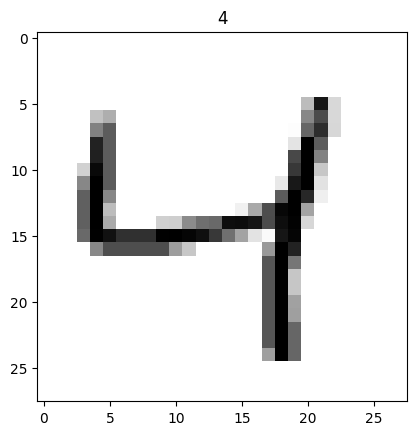

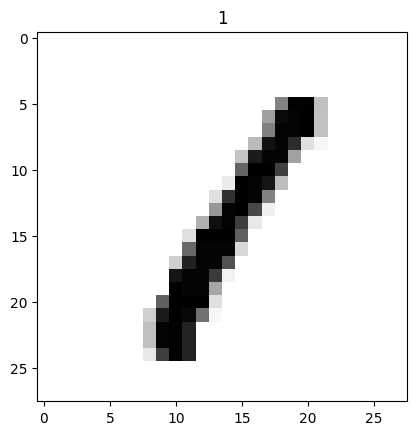

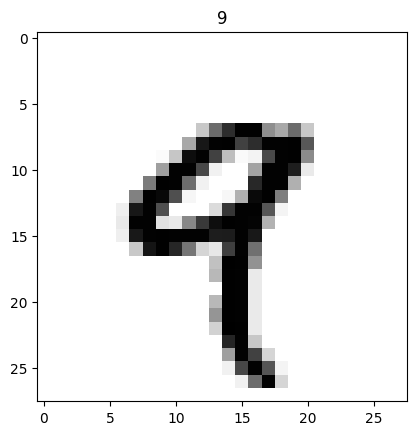

In [ ]:
for i in range(5):
  plot_input_img(i)
  print("\n")

In [ ]:
#Pre Process the images

#Normalizing the image to [0,1] range
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

#Expand the dimensions of images
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Building a Neural Network

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

#dense is used for classification
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
# Import necessary callbacks from Keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping: stops training when the validation accuracy does not improve for a set number of epochs
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

# ModelCheckpoint: saves the model after every epoch if validation accuracy improves
mc = ModelCheckpoint("/content/sample_data/bestmodel.keras", monitor="val_accuracy", verbose=1, save_best_only=True)

# Combine callbacks into a list
cb = [es, mc]

##Model Training

In [ ]:
his = model.fit(X_train,y_train,epochs=30,validation_split=0.3,callbacks=cb)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8539 - loss: 0.4754
Epoch 1: val_accuracy improved from -inf to 0.97717, saving model to /content/sample_data/bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8539 - loss: 0.4752 - val_accuracy: 0.9772 - val_loss: 0.0768
Epoch 2/30
1301/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9756 - loss: 0.0803
Epoch 2: val_accuracy improved from 0.97717 to 0.98000, saving model to /content/sample_data/bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9756 - loss: 0.0802 - val_accuracy: 0.9800 - val_loss: 0.0644
Epoch 3/30
1293/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.0555
Epoch 3: val_accuracy improved from 0.98000 to 0.98306, saving model to /content/sample_data/bestmodel.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9828 - loss: 0.0555 - val_accuracy: 0.9831 - val_loss: 0.0552
Epoch 4/30
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
model_S=keras.models.load_model("/content/sample_data/bestmodel.keras")

In [ ]:
#[0] returns the loss and any other index willl return the accuracy
score=model.evaluate(X_test,y_test)
print(f"The model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9875 - loss: 0.0409
The model accuracy is 0.9901999831199646


##Plotting Graphs for Model Evaluation

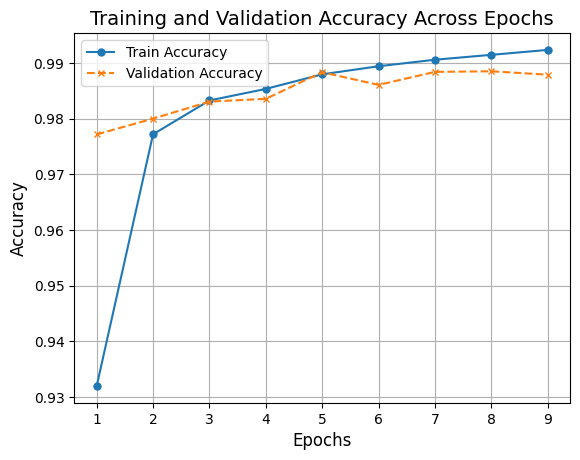

In [ ]:
#Plot training and validation accuracy
epochs = list(range(1,len(his.history['accuracy']) + 1))
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']

plt.plot(epochs, acc, label='Train Accuracy',linestyle='-', marker='o', markersize=5)
plt.plot(epochs, val_acc, label='Validation Accuracy', linestyle='--', marker='x', markersize=5)

plt.title('Training and Validation Accuracy Across Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs, fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.legend(fontsize=10)
plt.show()

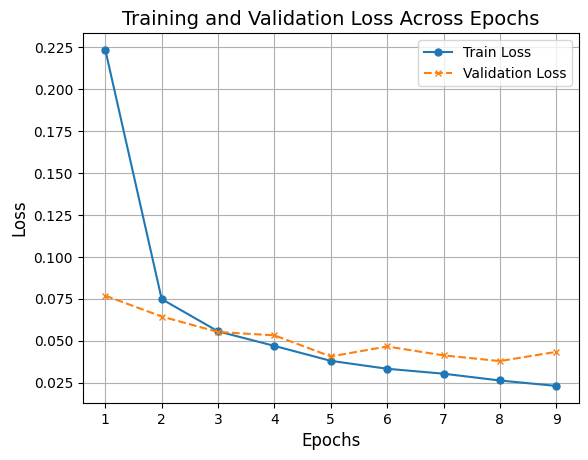

In [ ]:
#Plot training and validation loss
epochs = list(range(1,len(his.history['accuracy']) + 1))
acc = his.history['loss']
val_acc = his.history['val_loss']

plt.plot(epochs, acc, label='Train Loss',linestyle='-', marker='o', markersize=5)
plt.plot(epochs, val_acc, label='Validation Loss', linestyle='--', marker='x', markersize=5)

plt.title('Training and Validation Loss Across Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(epochs, fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.legend(fontsize=10)
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)
y_val_classes=np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Confusion Matrix

In [ ]:
#Compute confusion Matrix
conf_matrix=confusion_matrix(y_val_classes,y_pred_classes)
print("Confusion Matrix: ")
print(conf_matrix)

Confusion Matrix: 
tf.Tensor(
[[ 976    0    1    0    1    0    1    1    0    0]
 [   0 1131    2    0    0    0    1    1    0    0]
 [   0    1 1023    0    3    0    0    4    1    0]
 [   0    0    2 1007    0    0    0    0    1    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   1    0    1   15    0  871    1    1    2    0]
 [   1    2    1    0    2    2  946    0    4    0]
 [   0    2    6    1    0    0    0 1019    0    0]
 [   1    0    2    1    1    1    0    0  967    1]
 [   1    2    0    1   14    4    0    5    2  980]], shape=(10, 10), dtype=int32)


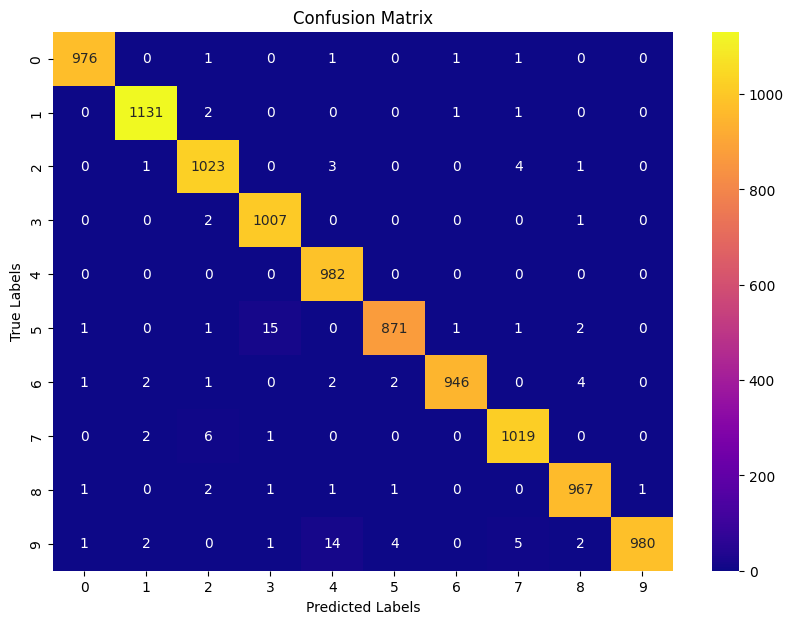

In [ ]:
# Visualize confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='plasma',xticklabels=np.arange(10),yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##Predict and display a  test image

In [ ]:
def multi_img(test_index):
  predicted_probs = model.predict(X_test[test_index:test_index + 1])
  predicted_class = np.argmax(predicted_probs)
  plt.imshow(X_test[test_index], cmap='binary')
  plt.title(f'Predicted: {predicted_class}, Actual: {np.argmax(y_test[test_index])}')
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


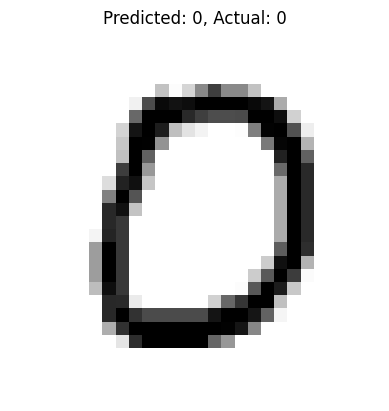

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


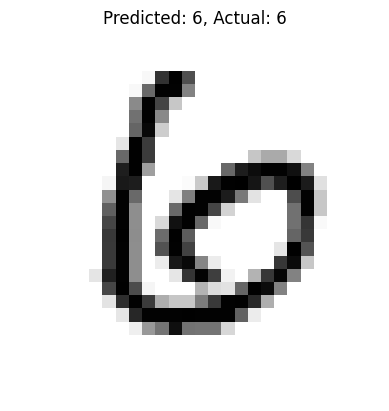

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


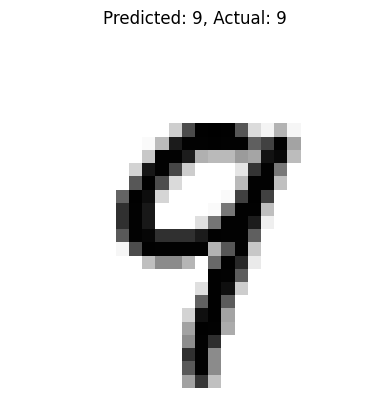

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


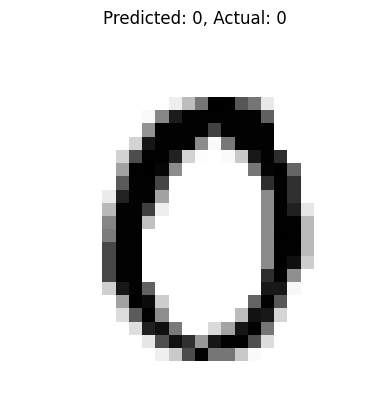

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


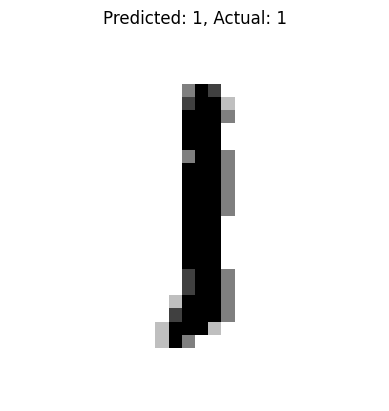

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


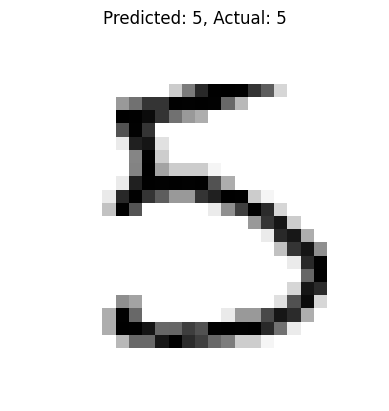

In [ ]:
for i in range(10,16):
  multi_img(i)